In [90]:
!pip3 install numpy matplotlib pandas scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [91]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [92]:
import kagglehub
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")
print("Path to dataset files:", path)

Path to dataset files: /Users/ayushsaini/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [93]:
data=pd.read_csv("/Users/ayushsaini/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv")
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [94]:
data["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

EDA

In [95]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [96]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [107]:
numerical_cols=[col for col in data.columns if data[col].dtypes!="object" and col!="credit_score" and col!="loan_status"]
categorical_cols=[col for col in data.columns if data[col].dtypes=="object" ]
print(f"No of numerical and categorical columns are : {len(numerical_cols)} and {len(categorical_cols)}")
print(f"Numerical columns  : {numerical_cols}")
print(f"Categorical columns : {categorical_cols}")

No of numerical and categorical columns are : 7 and 5
Numerical columns  : ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical columns : ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


<function matplotlib.pyplot.show(close=None, block=None)>

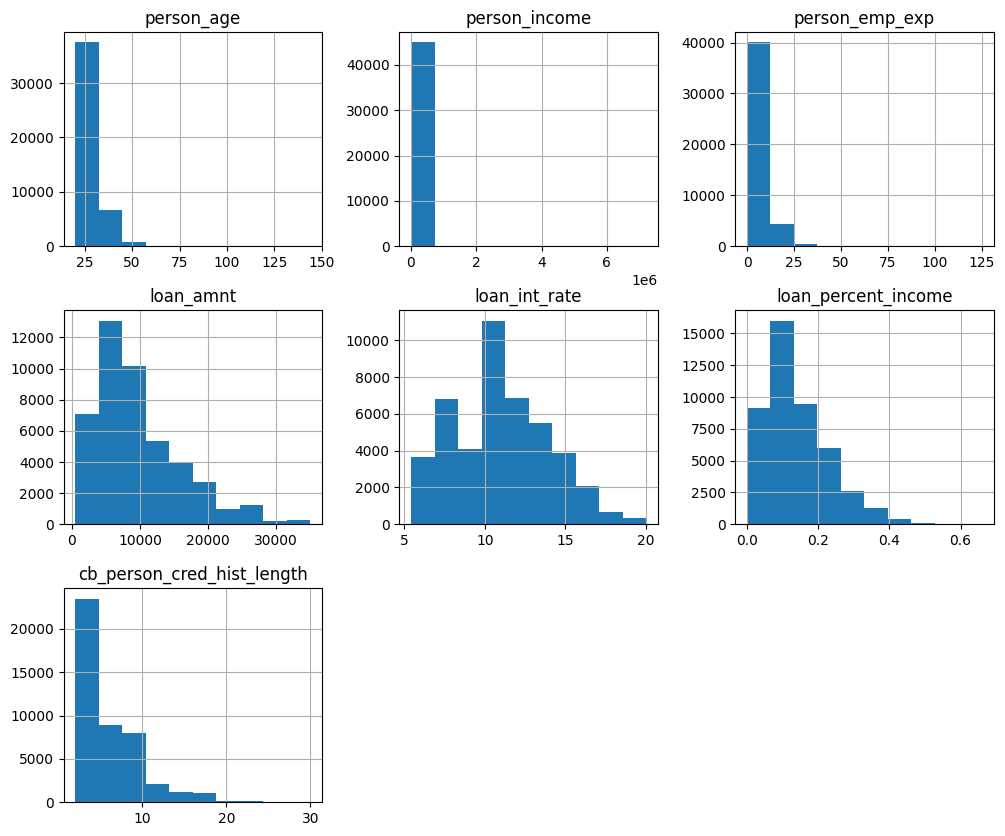

In [98]:
data[numerical_cols].hist(bins=10,figsize=(12,10))
plt.show

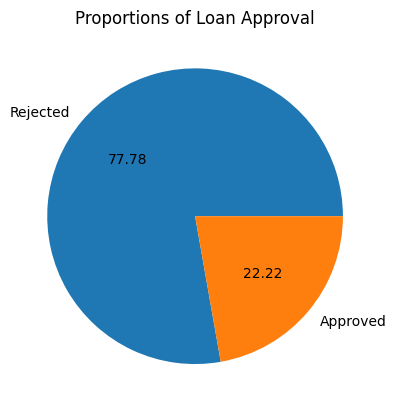

In [99]:
decision=data['loan_status'].value_counts()
plt.pie(decision.values,labels=["Rejected","Approved"],autopct="%.2f")
plt.title("Proportions of Loan Approval")
plt.show()

PIPELINE OPERATIONS

In [100]:
numerical_transformer=MinMaxScaler()
categorical_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_cols)
])
model=AdaBoostClassifier(learning_rate=0.9,n_estimators=300)
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

In [101]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_gender',
                                                   'person_education',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('model',
                 AdaBoostClassifier(learning_rate=0.9, n_estimators=300))])

In [102]:
y=data["loan_status"]
X=data.drop(["loan_status"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [103]:
pipeline.fit(X_train,y_train)

/Users/ayushsaini/PycharmProjects/Loan Approval/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_gender',
                                                   'person_education',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('model',
                 AdaBoostClassifier(learning_rate=0.9, n_estimators=300))])

In [104]:
y_predict=pipeline.predict(X_test)
print("Accuracy : ",accuracy_score(y_predict,y_test))

Accuracy :  0.9163333333333333
